In [1]:
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.getcwd()

'/home/grasshopper41/Escritorio'

In [3]:
PATH_generator = os.getcwd()
new_model = load_model(PATH_generator+'/generator/generator_001.h5')

In [13]:
def generate_images(model,test_input,tar,save_filename=False,display_imgs=True):
    prediction = model(test_input,training=True)
    
    if save_filename:
        tf.keras.preprocessing.image.save_img(PATH+'/output/'+save_filename+".jpg",
                                              prediction[0,...])
    
    plt.figure(figsize=(15,15))
    display_list = [test_input[0],tar[0],prediction[0]]
    title = ['Input Image','Ground Truth','Predicted Image']

    if display_imgs:
        for i in range(3):
            plt.subplot(1,3,i+1)
            plt.title(title[i])
            # Se obtiene el valor del pixel entre [0 1] para mostrarlo.
            plt.imshow(display_list[i]*0.5+0.5)
  
    plt.show()

In [5]:
def normalize(reimg,orimg):
    # Se divide entre 127.5 porque es la mitad de 255 y se le resta -1
    # para ecer que se agrupe en torno a esos valores
    # El objetivo de normalizar es que así la red neuronal procesa mejor los datos
    reimg = (reimg/127.5)-1
    orimg = (orimg/127.5)-1

    return reimg, orimg

def load_image(filename, INPATH='/home/grasshopper41/Escritorio/generator', 
               OUTPATH='/home/grasshopper41/Escritorio/generator'):
    # Se leen las imágenes del directorio y se codifican a extensión jpeg y se
    # cambian a variables de tipo float
    # La carga de canales se limita a 3 para evitar que entre algún canal alfa de 
    # 4 dimensiones como los archivos png

    reimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(INPATH+'/'+filename)),
                     tf.float32)[...,:3]  
    orimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(OUTPATH+'/'+filename)),
                     tf.float32)[...,:3]

  
    # Se normalizan las imágenes
    reimg, orimg = normalize(reimg,orimg)

    return reimg,orimg

def load_test_image(filename):
    return load_image(filename)

In [6]:
os.chdir("./generator")
os.getcwd()

'/home/grasshopper41/Escritorio/generator'

In [7]:
imgurls_test = !ls -1
imgurls_test

['assets',
 'foto.py',
 'generator_001.h5',
 'generator3.zip',
 'img2.jpg',
 'img.jpg',
 'saved_model.pb',
 'variables']

In [8]:
imgurls_test = [i for i in imgurls_test if i.endswith('2.jpg')]
imgurls_test

['img2.jpg']

In [9]:
ts_url = np.copy(imgurls_test)
ts_url

array(['img2.jpg'], dtype='<U8')

In [10]:
# Se realiza las mismas operaciones para el testeo
test_dataset = tf.data.Dataset.from_tensor_slices(ts_url)
test_dataset = test_dataset.map(load_test_image,
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)
# En el paper de pix2pix especifican un tamaño de lote de 1
test_dataset = test_dataset.batch(1)

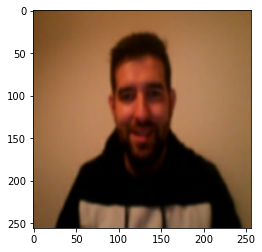

In [11]:
# Ejemplo, del dataset dame cinco lotes de tamaño 1
for reimg, orimg in test_dataset.take(5):
    plt.imshow(((reimg[0,...])+1)/2)
    plt.show()

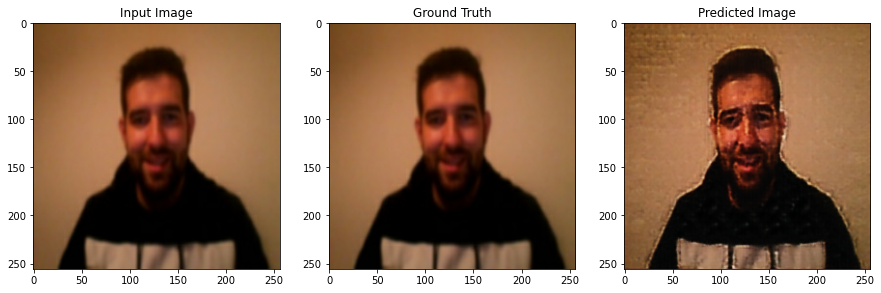

In [14]:
for inp, tar in test_dataset.take(84):
    generate_images(new_model, inp, tar)